In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected= True)

from PIL import Image

In [2]:
import folium
from folium import plugins

In [3]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'

 

In [4]:
plt.rcParams['figure.figsize'] = 8, 5


In [5]:
import warnings
warnings.filterwarnings('ignore')
import os

In [6]:
import pandas as pd

In [7]:
for dirname, _, filenames in os.walk('kaggle kernels output parulpandey/who-earned-the-most-in-sports-in-2020 -p /path/to/dest'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [8]:
data = r'C:\Users\HP\Documents\QA Python\Quantum Python Datasets\Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv'

In [9]:
data = pd.read_csv(r'C:\Users\HP\Documents\QA Python\Quantum Python Datasets\Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

In [10]:
data.head(10)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [11]:
# Creating a copy of the original dataframe- df
data_1 = data.copy()
data_1.drop('S.NO',axis=1,inplace=True)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [12]:
# Convert string to datetime64
data_1['Year'] = data_1['Year'].apply(pd.to_datetime,format='%Y')

#Set Date column as the index column.
data_1['year'] = pd.DatetimeIndex(data_1['Year']).year  
data_1.set_index('year', inplace=True)
data_1.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
data_1['Sport'] = data_1['Sport'].str.upper()
data_1.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0


In [14]:
#Highest paid athletes in 2020
data_2020 = data_1[data_1.index == 2020]

trace = go.Bar(
                    x = data_2020["earnings ($ million)"],
                    y = data_2020['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2020",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [15]:
ath =data_1[data_1['Current Rank'] == 1].sort_values('year', ascending = False)

In [13]:
# Top Paid Athlete for Each Year, 1990-2020
Top_paid_each_year = data_1[data_1['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

#z.style.set_properties(**{'background-color': 'pink',
                           # 'color': 'black',
                            #'border-color': 'white'})
z.style.background_gradient(cmap='Reds')  

,Name,Sport,Nationality,earnings ($ million)
year,,,,
2020,Roger Federer,TENNIS,Switzerland,106.300000
2019,Lionel Messi,SOCCER,Argentina,127.000000
2018,Floyd Mayweather,BOXING,USA,285.000000
2017,Cristiano Ronaldo,SOCCER,Portugal,93.000000
2016,Cristiano Ronaldo,SOCCER,Portugal,88.000000
2015,Floyd Mayweather,BOXING,USA,300.000000
2014,Floyd Mayweather,BOXING,USA,105.000000
2013,Tiger Woods,GOLF,USA,78.100000
2012,Floyd Mayweather,BOXING,USA,85.000000


In [72]:
Top_paid_each_year['Name'].value_counts().to_frame()

,Name
Tiger Woods,11
Michael Jordan,6
Floyd Mayweather,4
Cristiano Ronaldo,2
Michael Schumacher,2
Mike Tyson,2
Roger Federer,1
Lionel Messi,1
Evander Holyfield,1


In [73]:
#Athletes earning the most for the maximum amount of times
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
                    y = counts_top.index,
                    x = counts_top['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete earning the most,maximum number of times',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [77]:
Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()

,Name,earnings ($ million)
0,Cristiano Ronaldo,181.0
1,Evander Holyfield,60.5
2,Floyd Mayweather,775.0
3,Lionel Messi,127.0
4,Michael Jordan,293.1
5,Michael Schumacher,108.0
6,Mike Tyson,103.6
7,Roger Federer,106.3
8,Tiger Woods,987.4


In [78]:
Top_paid_each_year['Name'].value_counts().to_frame().reset_index()

,index,Name
0,Tiger Woods,11
1,Michael Jordan,6
2,Floyd Mayweather,4
3,Cristiano Ronaldo,2
4,Michael Schumacher,2
5,Mike Tyson,2
6,Roger Federer,1
7,Lionel Messi,1
8,Evander Holyfield,1


In [79]:
#Show income and top ranks
total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Name')

In [80]:
df_compare

,Name,earnings ($ million),Rank_counts
0,Cristiano Ronaldo,181.0,2
1,Evander Holyfield,60.5,1
2,Floyd Mayweather,775.0,4
3,Lionel Messi,127.0,1
4,Michael Jordan,293.1,6
5,Michael Schumacher,108.0,2
6,Mike Tyson,103.6,2
7,Roger Federer,106.3,1
8,Tiger Woods,987.4,11


In [81]:
import plotly.graph_objs as go
from plotly import tools
trace0 = go.Bar(
                y=df_compare['Name'],
                x=df_compare['Rank_counts'],
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Top Ranks',
                orientation='h',
)

trace1 = go.Scatter(
                y=df_compare['Name'],
                x=df_compare['earnings ($ million)'],
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)

layout = dict(
                title='Income and Top Ranks',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=False,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = df_compare['Rank_counts']
y_nw = np.rint(df_compare['earnings ($ million)'])
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, df_compare['Name']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-1,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+1,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
fig.show()

In [86]:
Top_paid_each_year.value_counts().to_frame()

0
Name               Nationality Current Rank Previous Year Rank Sport       earnings ($ million)   
Cristiano Ronaldo  Portugal    1            1                  SOCCER      93.0                  1
                                            3                  SOCCER      88.0                  1
Tiger Woods        USA         1            2                  GOLF        69.0                  1
                                            1                  GOLF        115.0                 1
                                                                           110.0                 1
                                                                           105.0                 1
                                                                           100.0                 1
                                                                           90.0                  1
                                                                           87.0                  1
                                                                           80.3                  1
                                                                           78.0                  1
                                                                           75.0                  1
Roger Federer      Switzerland 1            5                  TENNIS      106.3                 1
Mike Tyson         USA         1            2                  BOXING      75.0                  1
Michael Schumacher Germany     1            2                  AUTO RACING 49.0                  1
                                            1                  AUTO RACING 59.0                  1
Michael Jordan     USA         1            3                  BASKETBALL  35.9                  1
                                            2                  BASKETBALL  78.3                  1
                                            1                  BASKETBALL  43.9                  1
                                                                           36.0                  1
                                                                           30.0                  1
Lionel Messi       Argentina   1            2                  SOCCER      127.0                 1
Floyd Mayweather   USA         1            ?                  BOXING      85.0                  1
                                            >100               BOXING      285.0                 1
                                            14                 BOXING      105.0                 1
                                            1                  BOXING      300.0                 1
Evander Holyfield  USA         1            8                  BOXING      60.5                  1
Tiger Woods        USA         1            3                  GOLF        78.1                  1

In [87]:
#countries producing the most earners in sports
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top['Nationality'] ,
                    orientation='v',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which produces the maximum earners in Sports',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [88]:
Top_paid_each_year

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
2020,Roger Federer,Switzerland,1,5,TENNIS,106.3
2019,Lionel Messi,Argentina,1,2,SOCCER,127.0
2018,Floyd Mayweather,USA,1,>100,BOXING,285.0
2017,Cristiano Ronaldo,Portugal,1,1,SOCCER,93.0
2016,Cristiano Ronaldo,Portugal,1,3,SOCCER,88.0
2015,Floyd Mayweather,USA,1,1,BOXING,300.0
2014,Floyd Mayweather,USA,1,14,BOXING,105.0
2013,Tiger Woods,USA,1,3,GOLF,78.1
2012,Floyd Mayweather,USA,1,?,BOXING,85.0


In [89]:
#How much does the top paid paid athlete for each year earn?
trace = go.Scatter(
                    x = Top_paid_each_year.index,
                    y = Top_paid_each_year['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
data = [trace]
layout = go.Layout(title='How much did the Top Paid Athlete for Each Year, earn? ',width=800, height=500, 
                       xaxis= dict(title='Years'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [93]:
data_1['Sport'].value_counts().to_frame()

,Sport
BASKETBALL,81
BOXING,46
GOLF,44
SOCCER,33
TENNIS,23
AUTO RACING,18
AMERICAN FOOTBALL,17
F1 RACING,8
BASEBALL,6
F1 MOTORSPORTS,5


In [95]:
#Which sports dominate in earnings?
data_1['Sport'] = data_1['Sport'].str.upper() # Converting the text to uppercase
max_sport = data_1['Sport'].value_counts().to_frame()

trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Sport'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Sport which dominates in earnings',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [100]:
data_1['Nationality'].value_counts().to_frame()

,Nationality
USA,206
UK,13
Germany,13
Switzerland,12
Portugal,10
Brazil,9
Argentina,9
Canada,6
Italy,4
Finland,3


In [101]:
#Which country dominates the most in sport earnings?
max_sport = data_1['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which dominates in Sports earningss',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)



In [106]:
data_1['Name'].value_counts().to_frame()[:5]

,Name
Tiger Woods,19
Michael Jordan,19
Kobe Bryant,14
LeBron James,13
Michael Schumacher,13


In [24]:
#Top earners on the list
top_earners = data_1['Name'].value_counts().to_frame()[:5]
top_earners.style.background_gradient(cmap='Reds')  

,Name
Tiger Woods,19
Michael Jordan,19
Kobe Bryant,14
LeBron James,13
Michael Schumacher,13


In [111]:
name= data_1['Name'].value_counts().to_frame()
name[name['Name']==1].index

Index(['Matthew Stafford', 'Aaron Rodgers', 'Rafael Nadal', 'Kirk Cousins',
       'Aaron Rogers', 'Novak Djokovic', 'Jordan Spieth', 'Cam Newton',
       'Canelo Alvarez', 'Andrew Luck', 'Rory McIlroy', 'Drew Brees',
       'James Harden', 'Lewis Hamilton', 'Russell Wilson', 'Conor McGregor',
       'Deion Sanders', 'Donovan "Razor" Ruddock', 'Terrell Suggs',
       'Eli Manning', 'Emmit Smith', 'Dennis Rodman', 'Gerhard Berger',
       'Joe Sakic', 'Cecil Fielder', 'Sergei Federov', 'Gary Sheffield',
       'Jeff Gordon', 'Buster Douglas', 'Monica Seles', 'Michael Vick',
       'Lance Armstrong', 'Muhammad Ali', 'Tom Brady', 'Michael Moorer',
       'Dale Earnhardt Jr.', 'Greg Norman', 'Carson Wentz'],
      dtype='object')

In [112]:
data_1[data_1['Name']== 'Monica Seles']

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,,
1992,30,Monica Seles,USA,10,12,TENNIS,8.5


In [25]:
# People who appeared once on the list.
names = data_1['Name'].value_counts().to_frame()
names[names['Name']==1].index

# On scanning the list, we find the name of a sole women athlete- monica seles
monica = data_1[data_1['Name'] == 'Monica Seles']
monica.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1992,Monica Seles,USA,10,12,TENNIS,8.500000


In [28]:
#Top 3 earning players of all time
top_earners_alltime = pd.pivot_table(data_1, index='Name',values="earnings ($ million)", aggfunc='sum')
top3_earners_all = top_earners_alltime.sort_values(by="earnings ($ million)",ascending=False)[:3]

top3_earners_all.style.background_gradient(cmap='Reds')  
 

,earnings ($ million)
Name,
Tiger Woods,1373.800000
LeBron James,844.800000
Floyd Mayweather,840.000000


In [119]:
#Analysis of individual players using image background
def earnings_plot(dataframe,athlete,image_path,opacity):
    """
    function that creates a plotly line chart with image of the athlete in the background
    
    
    """
    athlete_df = data_1[data_1['Name'] == athlete]

    trace = go.Scatter(
                    x = athlete_df.index,
                    y = athlete_df['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='red',width=6)),
                    )
    data = [trace]
    layout= go.Layout(title= f'{athlete}' +"'s earnings over the Years",
                  xaxis=dict(title='Year'),
                  yaxis=dict(title="Earnings in US$ (millions)"),
                  images= [dict(
                          source=Image.open(image_path),
                          xref= "paper",
                          yref= "paper",
                          x= 0.5,
                          y= 0.5,
                          sizex= 1,
                          sizey= 1,
                          sizing= "stretch",
                          opacity= opacity,
                          xanchor= "center", 
                          yanchor="middle",
                          layer= "below")])
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [1]:
image_path = 'ronaldo.jpg'
earnings_plot(data_1, 'Cristiano Ronaldo', image_path, opacity =0.3)

NameError: name 'earnings_plot' is not defined

In [ ]:
#Focus on tiger woods 
image_path = "tiger_woods.jpg"
earnings_plot(data_1,'Tiger Woods',image_path,opacity=0.3)



In [ ]:
boxing = data_1[data_1['Sports'] == 'BOXING']


In [125]:
data_1 = data_1.reset_index()

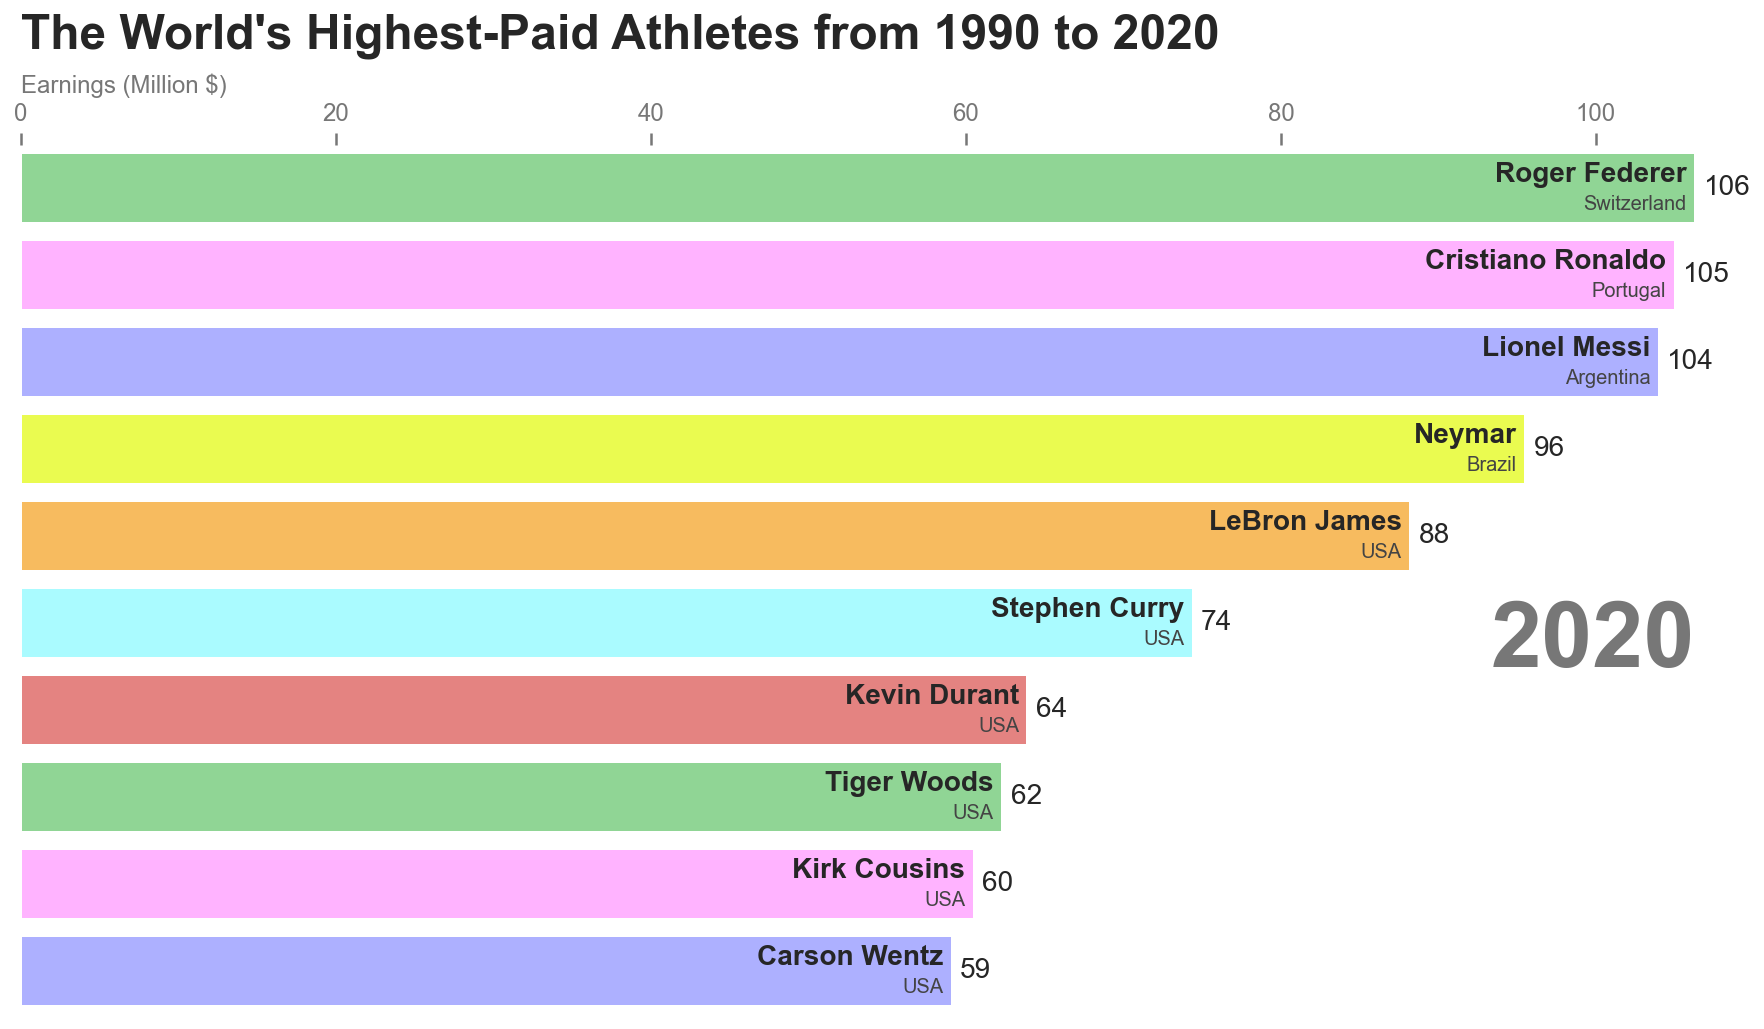

In [126]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

dat = data_1[['Name','Nationality','year','earnings ($ million)']]
dat.rename(columns={'earnings ($ million)':'value'},inplace=True)

group_lk = data_1.set_index('Name')['Nationality'].to_dict()

colors = ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]



fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = dat[dat['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Name'], dff['value'],color=colors)
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['Name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Earnings (Million $)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, "The World's Highest-Paid Athletes from 1990 to 2020",
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='white')
    plt.box(False)
    
draw_barchart(2020)

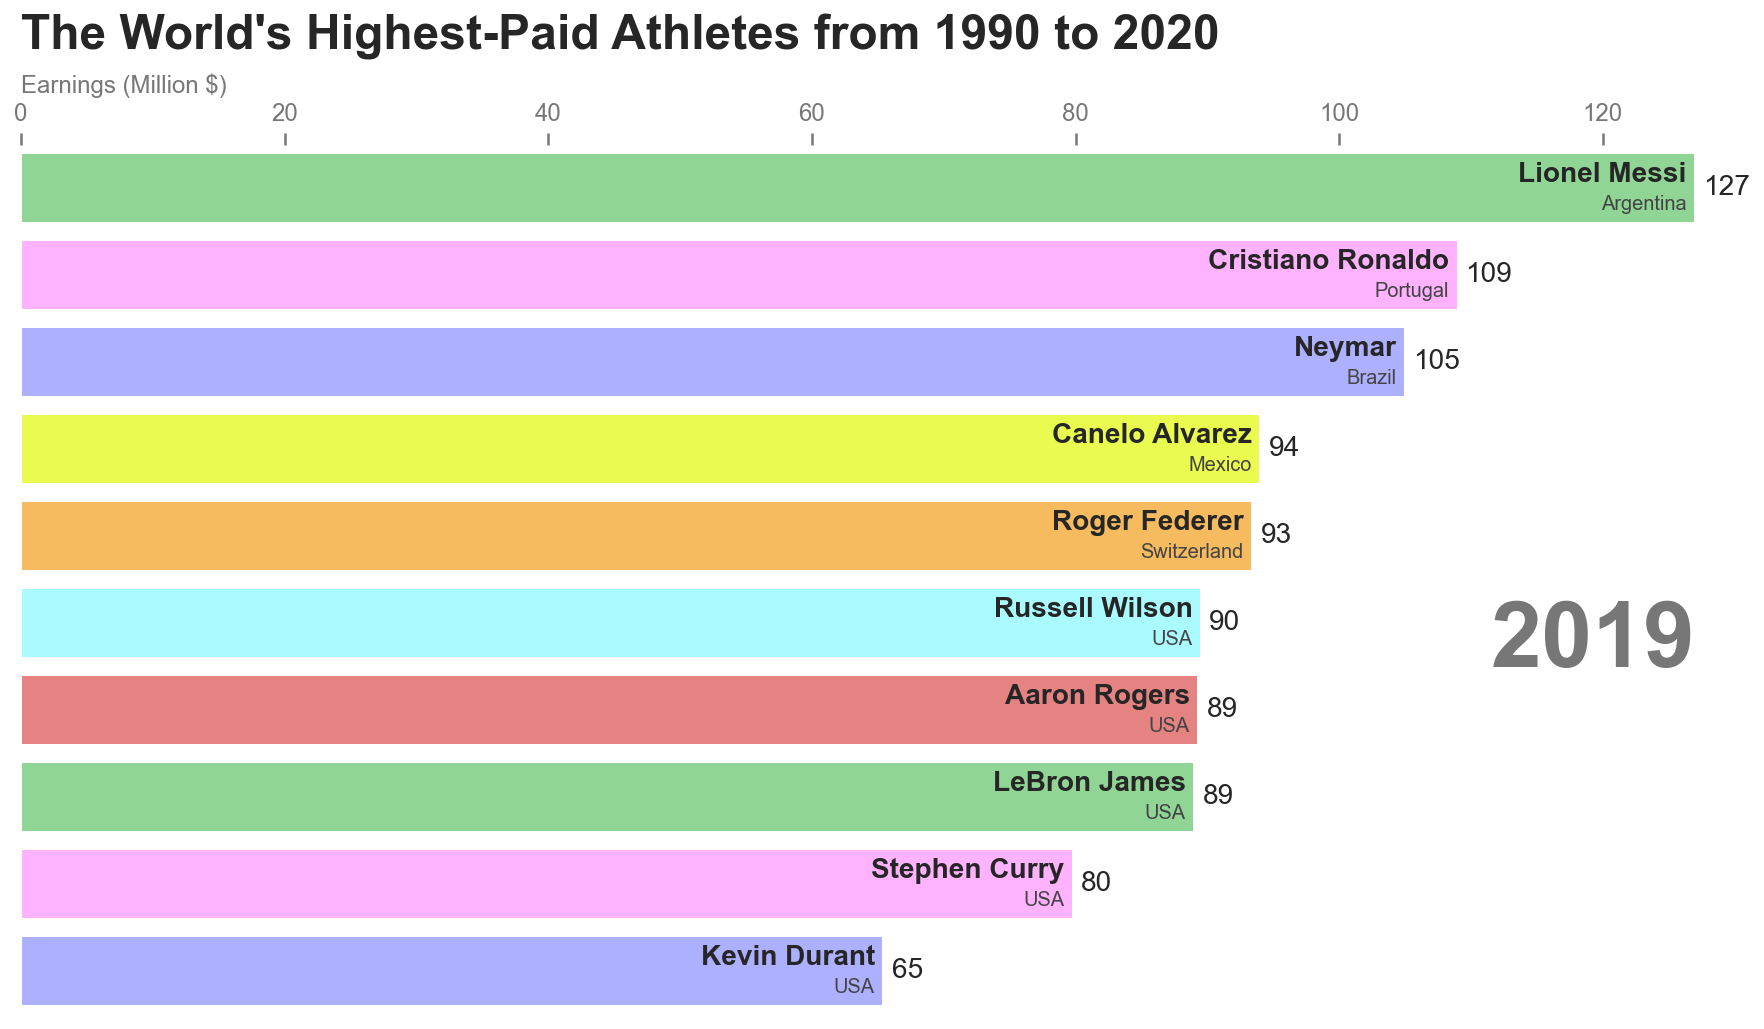

In [127]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1990, 2020))
HTML(animator.to_jshtml())